In [3]:
# Importação de bibliotecas
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [6]:
# Carregar uma imagem usando OpenCV
imagem_opencv = cv2.imread('imagem.png')

# Abrir uma imagem usando PIL
imagem_pil = Image.open('imagem.png')


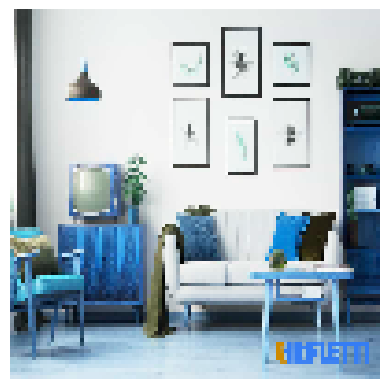

In [8]:
# Redimensionar a imagem usando OpenCV
imagem_redimensionada_opencv = cv2.resize(imagem_opencv, (100, 100))

plt.imshow(imagem_redimensionada_opencv)
plt.axis('off')
plt.show()


In [10]:
# Exemplo de conversão de formato usando OpenCV:
# Converter a imagem para outro formato usando OpenCV
cv2.imwrite('imagem_conversao.jpg', imagem_opencv)

# Exemplo de conversão de formato usando PIL:
# Converter a imagem para outro formato usando PIL
imagem_pil.save('imagem_conversao.png', format='PNG')

Filtragem de Imagem

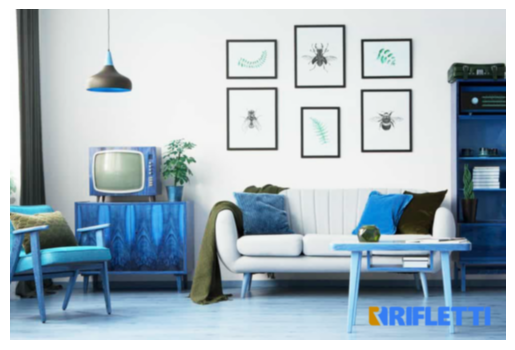

In [13]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')


# Aplicar filtro de suavização (média)
imagem_suavizada = cv2.blur(imagem, (5, 5))  # kernel de 5x5

plt.imshow(imagem_suavizada)
plt.axis('off')
plt.show()


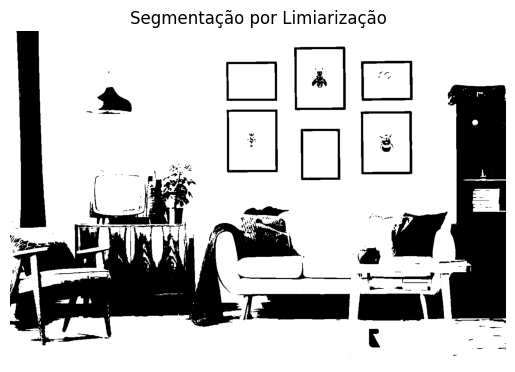

In [17]:

# Carregar a imagem
imagem = cv2.imread('imagem.png', cv2.IMREAD_GRAYSCALE)

# Aplicar limiarização
_, imagem_segmentada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)
# Aplicar limiarização para segmentar a imagem em preto e branco
# 127 é o valor de limiar, pixels abaixo deste valor serão definidos como preto (0), e acima como branco (255)

# Mostrar a imagem segmentada
plt.imshow(imagem_segmentada, cmap='gray')
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()


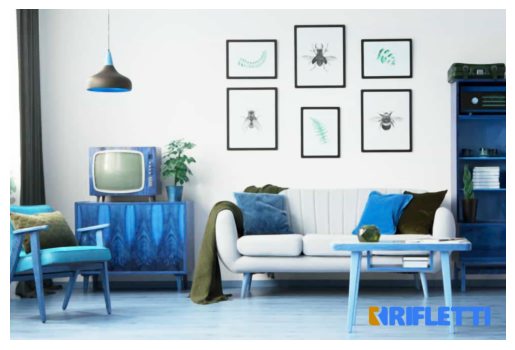

In [18]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')


# Aplicar filtro de mediana para remover ruído
imagem_sem_ruido = cv2.medianBlur(imagem, 5)

plt.imshow(imagem_sem_ruido)
plt.axis('off')
plt.show()

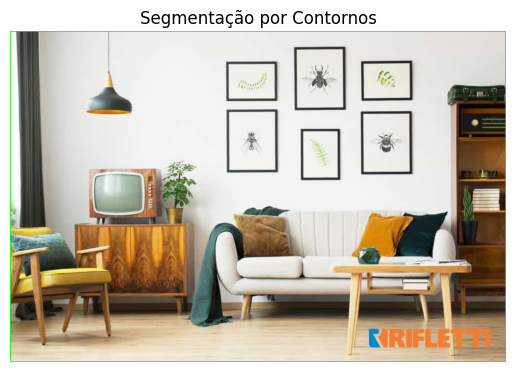

In [20]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de contornos
contornos, _ = cv2.findContours(imagem_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem para desenhar os contornos
imagem_contornos = imagem.copy()

# Desenhar os contornos na imagem de contornos
# cv2.drawContours desenha os contornos encontrados na imagem de contornos
# -1 indica que todos os contornos devem ser desenhados
# (0, 255, 0) especifica a cor dos contornos (no formato BGR, verde neste caso)
# 2 especifica a espessura da linha dos contornos
cv2.drawContours(imagem_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
plt.imshow(cv2.cvtColor(imagem_contornos, cv2.COLOR_BGR2RGB))  # Converter de BGR para RGB para exibir corretamente com matplotlib
plt.axis('off')  # Desativa os eixos
plt.title('Segmentação por Contornos')  # Adiciona um título à imagem
plt.show()  # Exibe a imagem

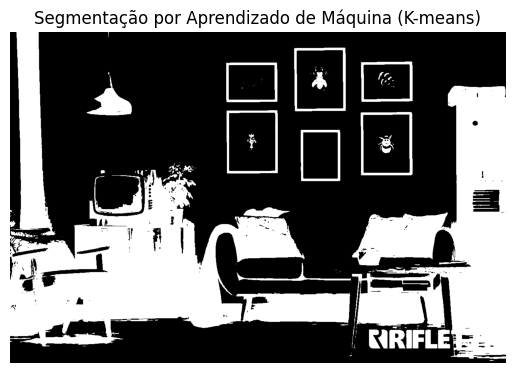

In [22]:
# Exemplo de Segmentação Baseada em Aprendizado de Máquina:
# Este código demonstra um exemplo de segmentação de imagem usando o algoritmo K-means.

# Instale a biblioteca scikit-learn se ainda não estiver instalada
# py -m pip install -U scikit-learn

# Importar bibliotecas necessárias
from sklearn.cluster import KMeans  # Importa o algoritmo K-means da biblioteca scikit-learn
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays

# Converter imagem para um vetor 1D
# A imagem é convertida em um array 1D para facilitar a aplicação do algoritmo K-means
imagem_reshaped = imagem.reshape((-1, 3))  # Reshape para um vetor de características (cada linha representa um pixel)

# Aplicar K-means para segmentação
# O algoritmo K-means é aplicado para agrupar os pixels da imagem em clusters
# n_clusters=2 indica que queremos dividir a imagem em 2 clusters (por exemplo, objetos e fundo)
kmeans = KMeans(n_clusters=2)  # Cria uma instância do algoritmo K-means com 2 clusters
kmeans.fit(imagem_reshaped)  # Aplica o K-means aos dados da imagem
clusters = kmeans.predict(imagem_reshaped)  # Prevê o cluster de cada pixel na imagem

# Remontar a imagem segmentada
# A imagem segmentada é reconstruída usando os clusters previstos
# A forma da imagem resultante é a mesma da imagem original
imagem_segmentada = clusters.reshape(imagem.shape[:2])  # Reshape para a forma da imagem original

# Mostrar a imagem segmentada
# A imagem segmentada é exibida em escala de cinza
plt.imshow(imagem_segmentada, cmap='gray')  # Exibe a imagem segmentada
plt.axis('off')  # Desativa os eixos
plt.title('Segmentação por Aprendizado de Máquina (K-means)')  # Adiciona um título à imagem
plt.show()  # Mostra a imagem segmentada

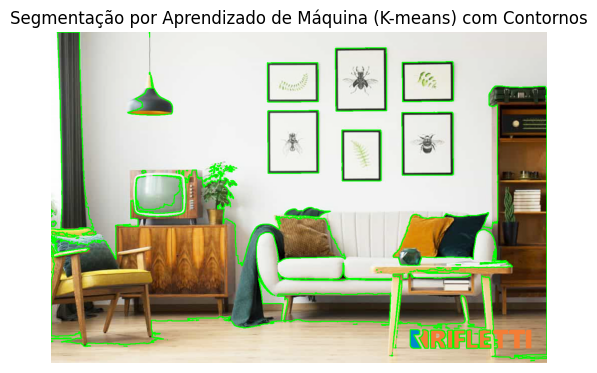

In [24]:
# Converter imagem para um vetor 1D
imagem_reshaped = imagem.reshape((-1, 3))

# Aplicar K-means para segmentação
kmeans = KMeans(n_clusters=2)
kmeans.fit(imagem_reshaped)
clusters = kmeans.predict(imagem_reshaped)

# Remontar a imagem segmentada
imagem_segmentada = clusters.reshape(imagem.shape[:2])

# Encontrar contornos na imagem segmentada
contornos, _ = cv2.findContours(imagem_segmentada.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem original para desenhar os contornos
imagem_com_contornos = imagem.copy()

# Desenhar os contornos na imagem original
cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
plt.imshow(cv2.cvtColor(imagem_com_contornos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Segmentação por Aprendizado de Máquina (K-means) com Contornos')
plt.show()

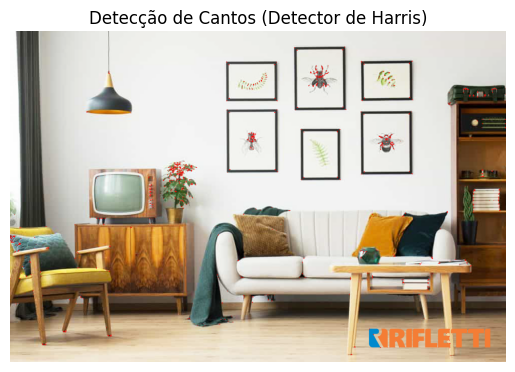

In [26]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar pontos de interesse usando o detector de Harris
# O detector de Harris é usado para identificar cantos ou pontos de interesse na imagem
# O parâmetro "ksize" especifica o tamanho da janela de sobel usada para calcular a derivada do gradiente da imagem
# O parâmetro "k" é um parâmetro de livre escolha na função de resposta do detector de Harris
cantos = cv2.cornerHarris(imagem_gray, 2, 3, 0.04)

# Destacar os pontos de interesse na imagem original
# A linha acima destaca os cantos em vermelho na imagem original se a intensidade do canto for maior que 1% do máximo
imagem[cantos > 0.01 * cantos.max()] = [0, 0, 255]  # Destacar os cantos em vermelho

# Mostrar a imagem com os cantos detectados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  # Converter a imagem de BGR para RGB para exibição correta
plt.title('Detecção de Cantos (Detector de Harris)')  # Título da imagem
plt.axis('off')  # Desativar os eixos
plt.show()  # Mostrar a imagem

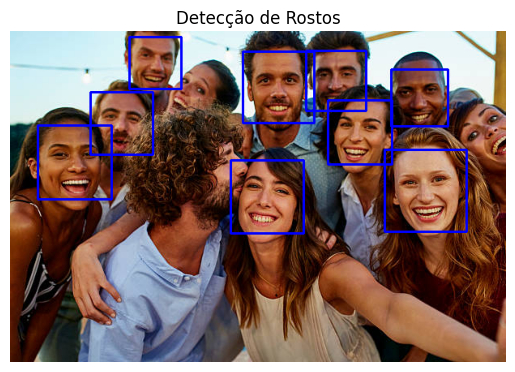

In [28]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('image.jpg')

# Carregar o classificador de detecção de faces pré-treinado
classificador_faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converter a imagem para escala de cinza (necessário para detecção de objetos)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = classificador_faces.detectMultiScale(imagem_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor dos rostos detectados
for (x, y, w, h) in faces:
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Exibir a imagem com os rostos detectados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Detecção de Rostos')
plt.axis('off')
plt.show()